# **Milestone 3**
---
---

### 1. Import and process data

In [1]:
from scripts import project_functions as pf

df = pf.load_and_process("../data/raw/Kepler_Exoplanet_Search_Results.csv")

df

,id,Kepler id,KOI Name,kepler_name,Exoplanet Archive Disposition,Disposition Using Kepler Data,Confidence,Not Transit Like,Stellar Eclipse,Centroid Offset,...,Planetary Radius (km),Equilibrium Temperature (Kelvin),Stellar Effective Temperature (Kelvin),Stellar Surface Gravity (log10(cm s-2),Stellar Surface Gravity (m/s^2),Stellar Radius (solar radii),Stellar Radius (km),Mass of the Star (kg),Right Ascension,Declination
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,14398.46,793.0,5455.0,4.467,293.089325,0.927,645507.18,1.829830e+30,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,18029.93,443.0,5455.0,4.467,293.089325,0.927,645507.18,1.829830e+30,291.93423,48.141651
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,93016.60,638.0,5853.0,4.544,349.945167,0.868,604423.12,1.915538e+30,297.00482,48.134129
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,213173.66,1395.0,5805.0,4.564,366.437575,0.791,550804.94,1.665729e+30,285.53461,48.285210
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,17520.25,1406.0,6031.0,4.438,274.157417,1.046,728371.64,2.179288e+30,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,7071.81,929.0,5638.0,4.296,197.696964,1.088,757617.92,1.700235e+30,298.74921,46.973351
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,186988.85,2088.0,5638.0,4.529,338.064836,0.903,628795.02,2.002750e+30,297.18875,47.093819
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,4587.12,1608.0,6119.0,4.444,277.971327,1.031,717926.54,2.146686e+30,286.50937,47.163219
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,6816.97,2218.0,6173.0,4.447,279.898132,1.041,724889.94,2.203701e+30,294.16489,47.176281


---
---
### 2. Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", font_scale=1)

---
##### 1. Count of Exoplanet Status

[Text(0.5, 1.0, 'Count of Exoplanet Status')]

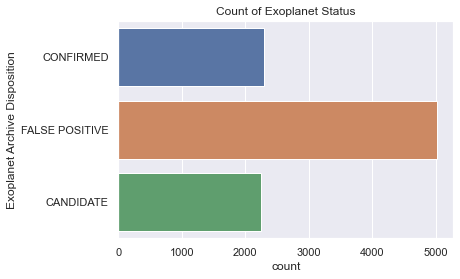

In [3]:
sns.countplot(y="Exoplanet Archive Disposition", data=df).set(title="Count of Exoplanet Status")

- Candidates are planets that are in potential habitable zone, terrestrial, and possibly Earth-like
- Confirmed status means they are indeed a planet, but are not habitable by humans
- False positives are those recorded by Kepler, but failed the validation process, caused by one or more of the following reasons:
    - light curve is not consistent with a transiting planet (Not Transit-like)
    - transit-like event most likely caused by an eclipsing binary star, or the planet is self-luminous (Stellar Eclipse)
    - the signal is from a star, not planets (Centroid Offset)
    - flux contamination in the aperture (Contamination)

---
##### 2. Reasons for Failed Validation

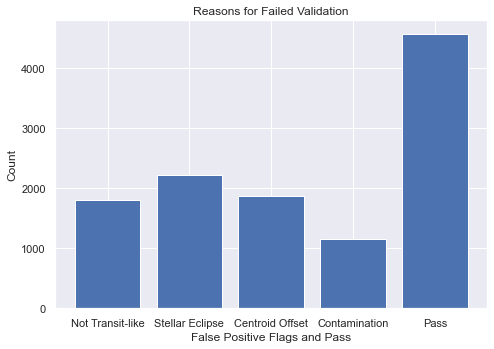

In [4]:
not_transit_like_count = 0
stellar_eclipse_count = 0
centroid_offset_count = 0
contamination_count = 0
pass_count = 0

size = df.shape[0]
not_transit_like = df["Not Transit Like"]
stellar_eclipse = df["Stellar Eclipse"]
centroid_offset = df["Centroid Offset"]
contamination = df["Contamination"]

for i in range(0, size):
    if not_transit_like[i] == 1:
        not_transit_like_count += 1
    if stellar_eclipse[i] == 1:
        stellar_eclipse_count += 1
    if centroid_offset[i] == 1:
        centroid_offset_count += 1
    if contamination[i] == 1:
        contamination_count += 1
    if not_transit_like[i] == 0 and stellar_eclipse[i] == 0 and centroid_offset[i] == 0 and contamination[i] == 0:
        pass_count += 1

data = {"Not Transit-like":not_transit_like_count, "Stellar Eclipse":stellar_eclipse_count, "Centroid Offset":centroid_offset_count, "Contamination":contamination_count, "Pass":pass_count}
x = list(data.keys())
y = list(data.values())
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel("False Positive Flags and Pass")
ax.set_ylabel("Count")
ax.set_title("Reasons for Failed Validation")
ax.bar(x, y)
plt.show()

- Most transit events are caused by panets ecplising their stars, about 4600 passed validation
- Significant seconday events i.e. stellar eclipse are the most common casue of false positive
- False postive caused by flux contamination is the least common one, but still flaged more than 1000 entries

---
##### 3. Time of first record vs. number of plant recorded

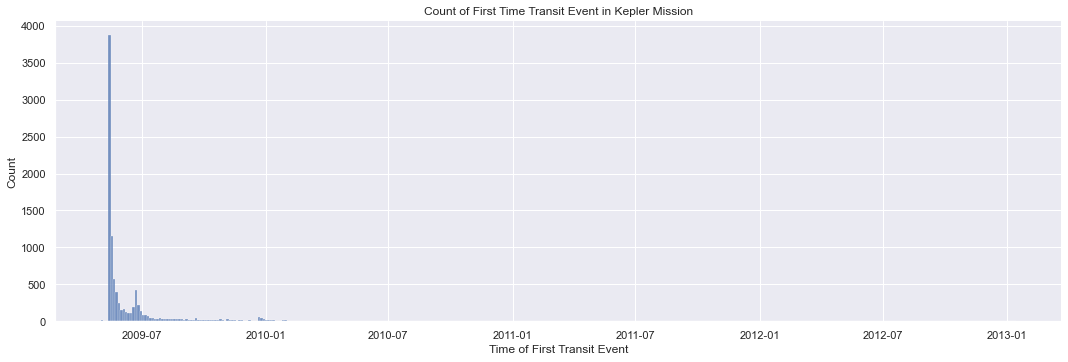

In [5]:
sns.displot(data=df, x="Time of First Transit Event", aspect=3).set(title="Count of First Time Transit Event in Kepler Mission")

- The Kepler telescope detected most of transit events of that section of space at the first few months of its mission

---
##### 4. Distribution of Exoplanet Radius in km

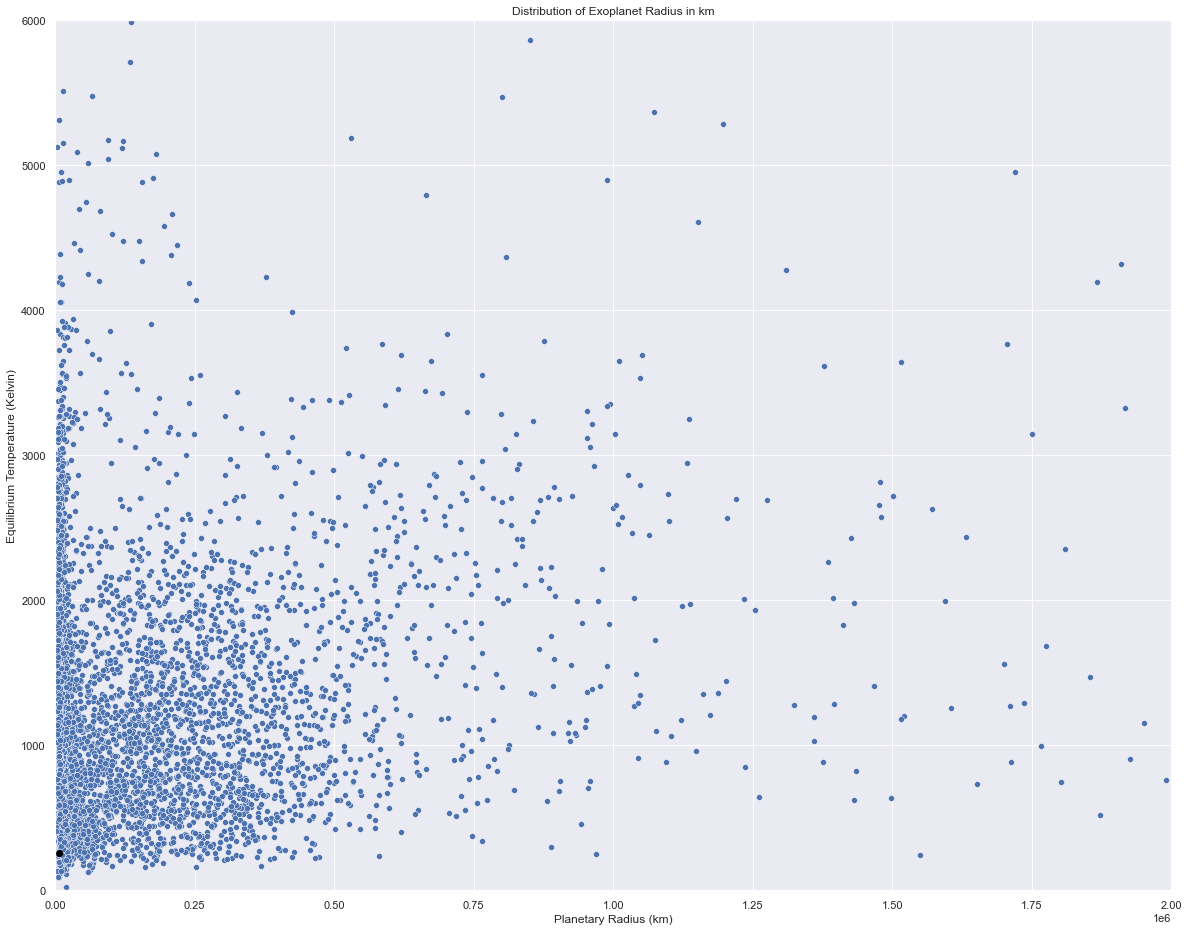

In [6]:
plt.figure(figsize=(20,16))
ax = sns.scatterplot(data=df, x="Planetary Radius (km)", y="Equilibrium Temperature (Kelvin)")
ax.set(xlim=(0, 2000000))
ax.set(ylim=(0, 6000))
ax.set_title("Distribution of Exoplanet Radius in km")
plt.scatter(x=6371, y=255, color='black')

- this graph plots radius against Equilibrium Temperature, two defining features of Earth
- it shows how exoplanets's conditions distributes, and how they compare to Earth
- plot excluded 99 planets with radius over 2,000,000 km
- also excluded 27 planets with radius over 6000 k
- the black dot at left bottom corner is Earth (255k Equilibrium Temperature, 6371 km radius)
- Earth is actually very small, and quite cold, just like most of the planets

---
---
### 3. Research Questions

##### 1. Did the Kepler telescope discover most of the candidates at the beginning of its mission?
#####    Also, were the discoveries that came late in mission timeline mostly false postive?

Text(0.5, 1.0, 'Distribution of Discovered Candidates in Mission Time Line')

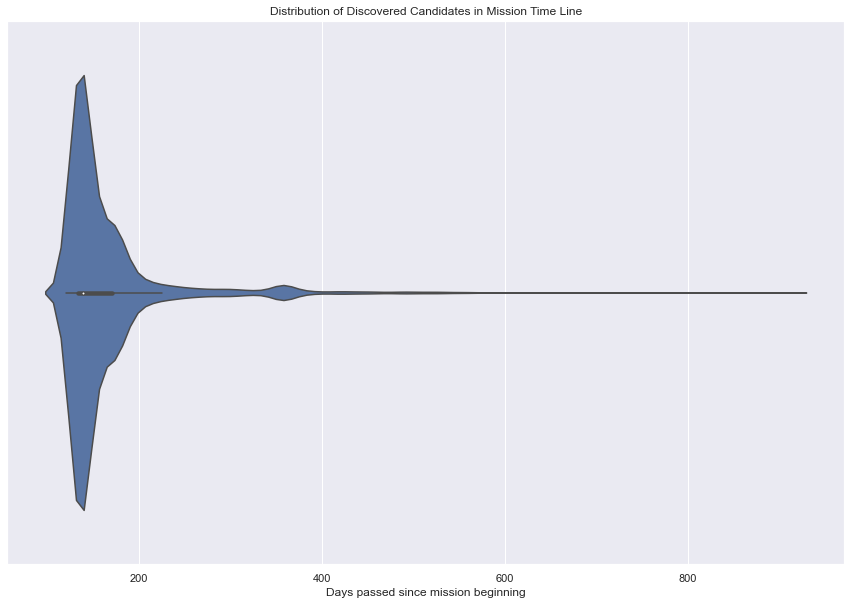

In [7]:
candidate = df[df["Disposition Using Kepler Data"] == "CANDIDATE"]
plt.figure(figsize=(15,10))
ax1 = sns.violinplot(x="Transit Epoch", data=candidate)
ax1.set_xlabel("Days passed since mission beginning")
ax1.set_title("Distribution of Discovered Candidates in Mission Time Line")

Text(0.5, 1.0, 'Distribution of False Positives in Mission Time Line')

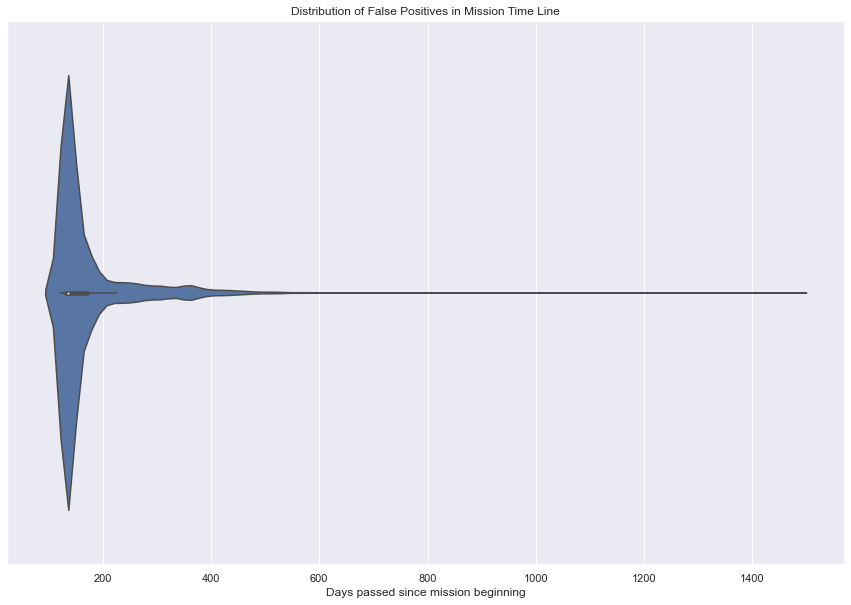

In [8]:
false_postive =  df[df["Disposition Using Kepler Data"] == "FALSE POSITIVE"]
plt.figure(figsize=(15,10))
ax2 = sns.violinplot(x="Transit Epoch", data=false_postive)
ax2.set_xlabel("Days passed since mission beginning")
ax2.set_title("Distribution of False Positives in Mission Time Line")

**Yes, it did discover most of the candidates before the first 200 days of its mission.**

**No to the second question, Kepler also discovered most of its false positives before the 200 days mark.**

---
##### 2. Is our Sun above average?

Text(0.5, 1.0, 'Distribution of Radius of Stars in km')

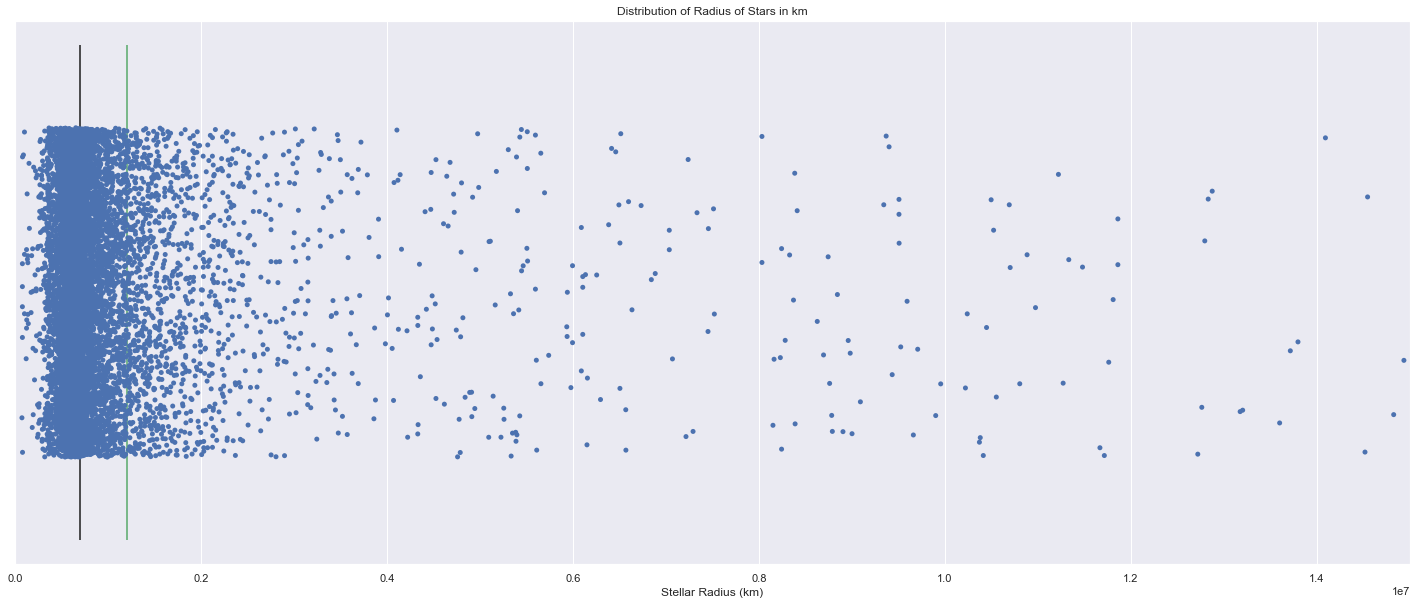

In [9]:
temp = df["Stellar Radius (km)"].mean()
plt.figure(figsize=(25,10))
ax3 = sns.stripplot(x=df["Stellar Radius (km)"])
ax3.set(xlim=(0, 15000000))
ax3.vlines(696340, -0.15, 0.15, color="k")
ax3.vlines(temp, -0.15, 0.15, color="g")
ax3.set_title("Distribution of Radius of Stars in km")

- Black line is where our sun is, green line is the average radius
- plot excluded 40 stars with radius more than 15,000,000 km

Text(0.5, 1.0, 'Distribution of Temperature of Stars in Kevin')

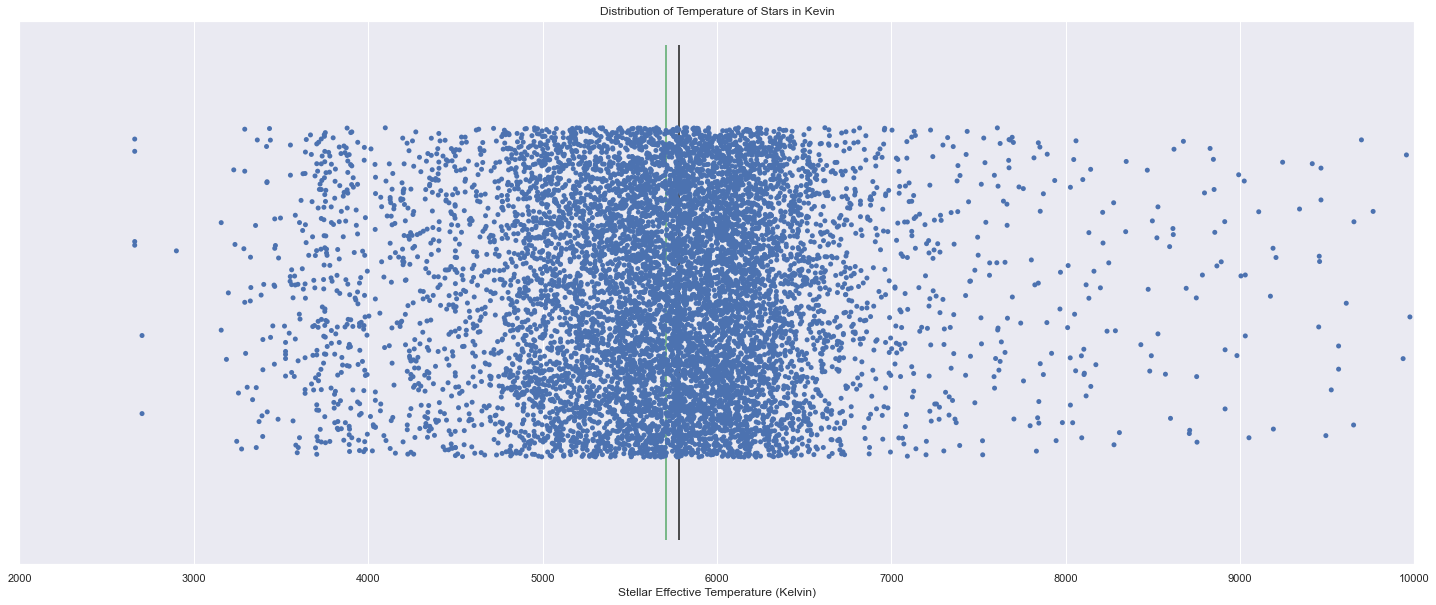

In [10]:
temp = df["Stellar Effective Temperature (Kelvin)"].mean()
plt.figure(figsize=(25,10))
ax4 = sns.stripplot(x=df["Stellar Effective Temperature (Kelvin)"])
ax4.set(xlim=(2000, 10000))
ax4.vlines(5780, -0.15, 0.15, color="k")
ax4.vlines(temp, -0.15, 0.15, color="g")
ax4.set_title("Distribution of Temperature of Stars in Kevin")

- Black line is where our sun is, green line is the average stellar effective Temperature
- 14 stars with temperature over 10000k excluded

Text(0.5, 1.0, 'Distribution of Surface Gravity of Stars in m/s^2')

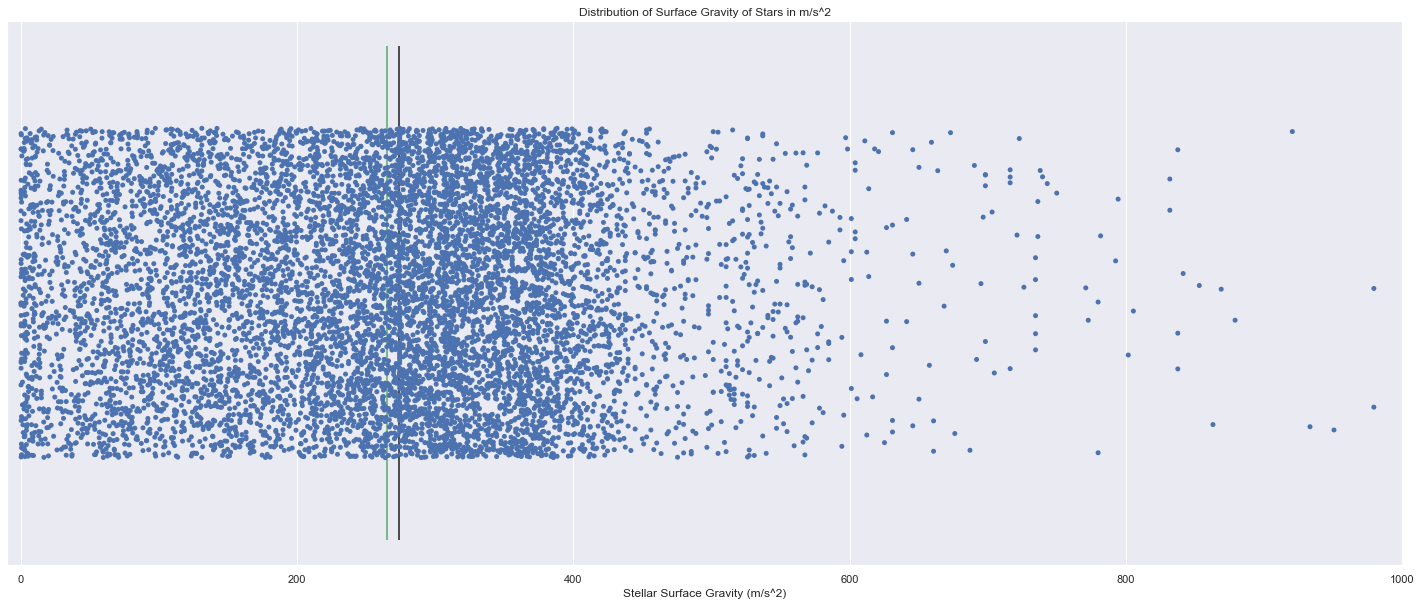

In [11]:
temp = df["Stellar Surface Gravity (m/s^2)"].mean()
plt.figure(figsize=(25,10))
ax5 = sns.stripplot(x=df["Stellar Surface Gravity (m/s^2)"])
ax5.set(xlim=(-10, 1000))
ax5.vlines(274, -0.15, 0.15, color="k")
ax5.vlines(temp, -0.15, 0.15, color="g")
ax5.set_title("Distribution of Surface Gravity of Stars in m/s^2")

- 27 outlier excluded

Text(0.5, 1.0, 'Distribution of Mass of Stars in kg')

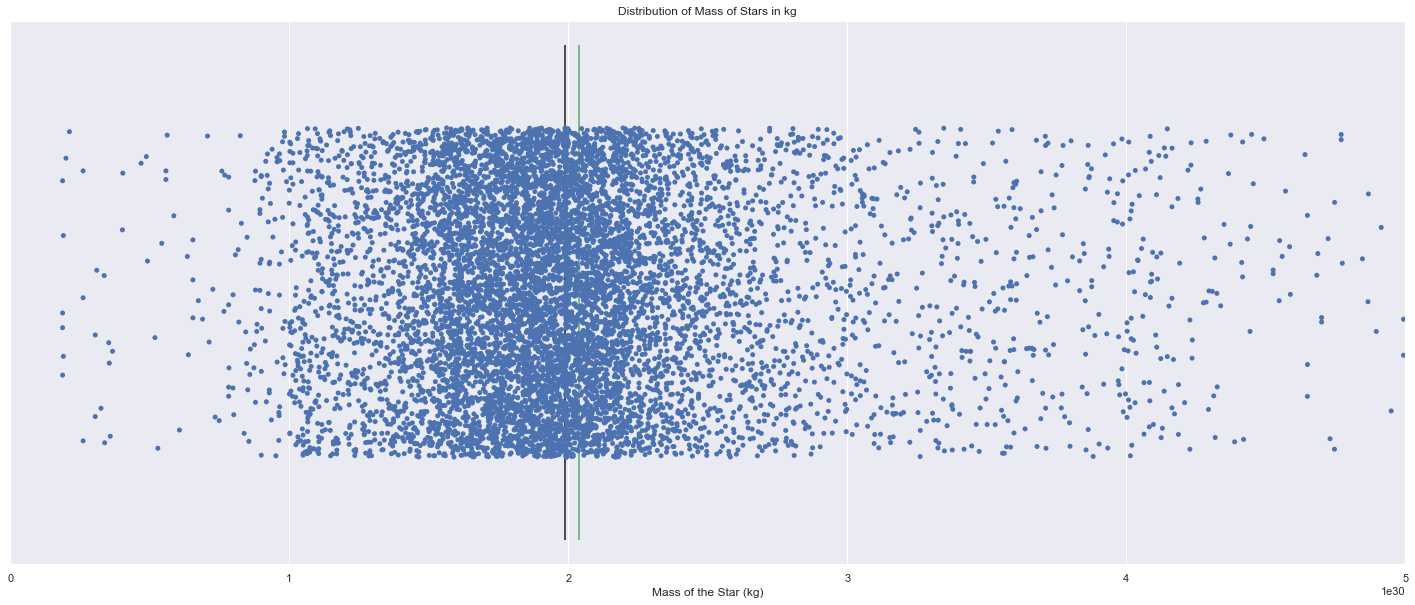

In [12]:
temp = df["Mass of the Star (kg)"].mean()
plt.figure(figsize=(25,10))
ax6 = sns.stripplot(x=df["Mass of the Star (kg)"])
ax6.set(xlim=(0, 5e30))
ax6.vlines(1.989e30, -0.15, 0.15, color="k")
ax6.vlines(temp, -0.15, 0.15, color="g")
ax6.set_title("Distribution of Mass of Stars in kg")

- 88 outlier not included

**Our sun falls behind in size, but is above average in stellar effective temperature and surface gravity. It is around the mean of mass of stars.**

**The sun is actually quite average.**

---
##### 3. How long do the exoplanets orbit around their stars?

Average orbital period is 75.67 days
Longest orbiting planet needs a whopping 129995.78 days to go around its star for just one time, about 356.15 years
Fastest orbiting planet takes just 0.24184 days, that is just 5.804 hours


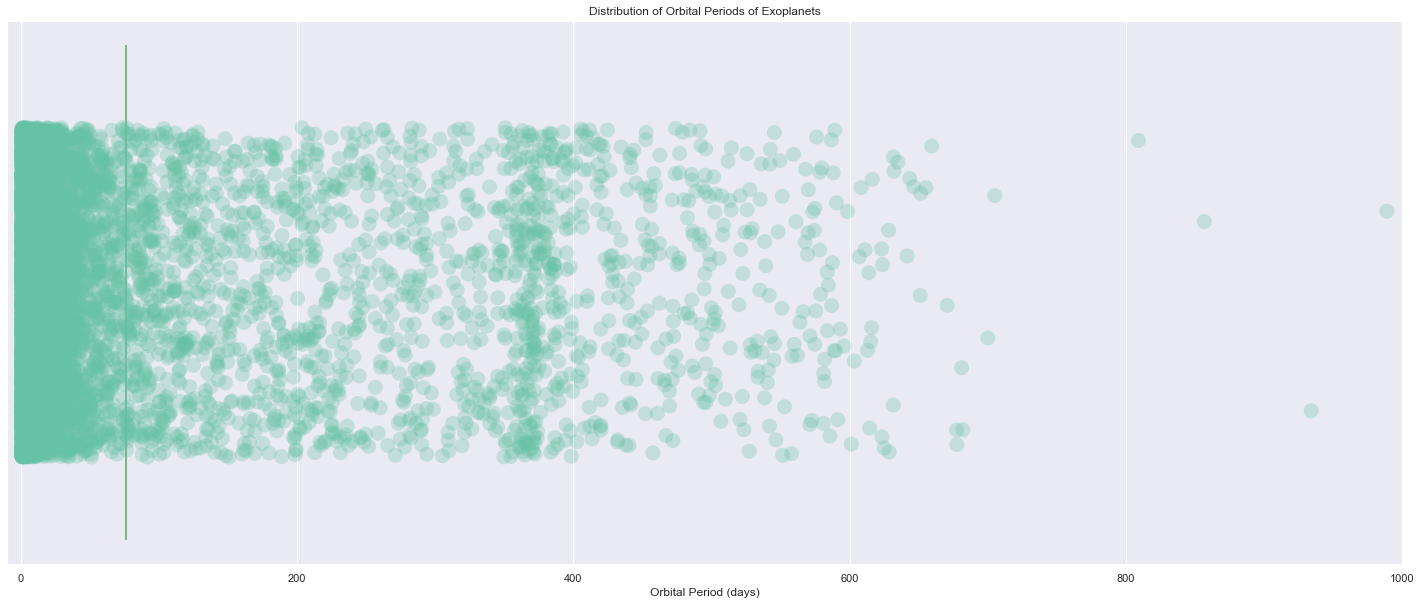

In [13]:
temp = df["Orbital Period (days)"].mean()
plt.figure(figsize=(25,10))
ax7 = sns.stripplot(x=df["Orbital Period (days)"], size = 15, palette="Set2", edgecolor="gray", alpha=.3)
ax7.set(xlim=(-10, 1000))
ax7.vlines(temp, -0.15, 0.15, color="g")
ax7.set_title("Distribution of Orbital Periods of Exoplanets")
print("Average orbital period is %.2f days" % (df["Orbital Period (days)"].mean()))
print("Longest orbiting planet needs a whopping %.2f days to go around its star for just one time, about %.2f years" % (df["Orbital Period (days)"].max(), df["Orbital Period (days)"].max() / 365))
print("Fastest orbiting planet takes just %.5f days, that is just %.3f hours" % (df["Orbital Period (days)"].min(), df["Orbital Period (days)"].min() * 24))

- excluded 9 planets with orbital period over 1000 days.

**Average orbital period is 75.67 days**

**Longest orbiting planet needs a whopping 129995.78 days to go around its star for just one time, about 356.15 years**

**Fastest orbiting planet takes just 0.24184 days, that is just 5.804 hours**

---
##### 4. How are the planets distributed across the sky?
Right Ascenion and Declination are kind of like the longitude and latitude for the night sky.

[Text(0.5, 1.0, 'Distribution of Exoplanets in the Sky')]

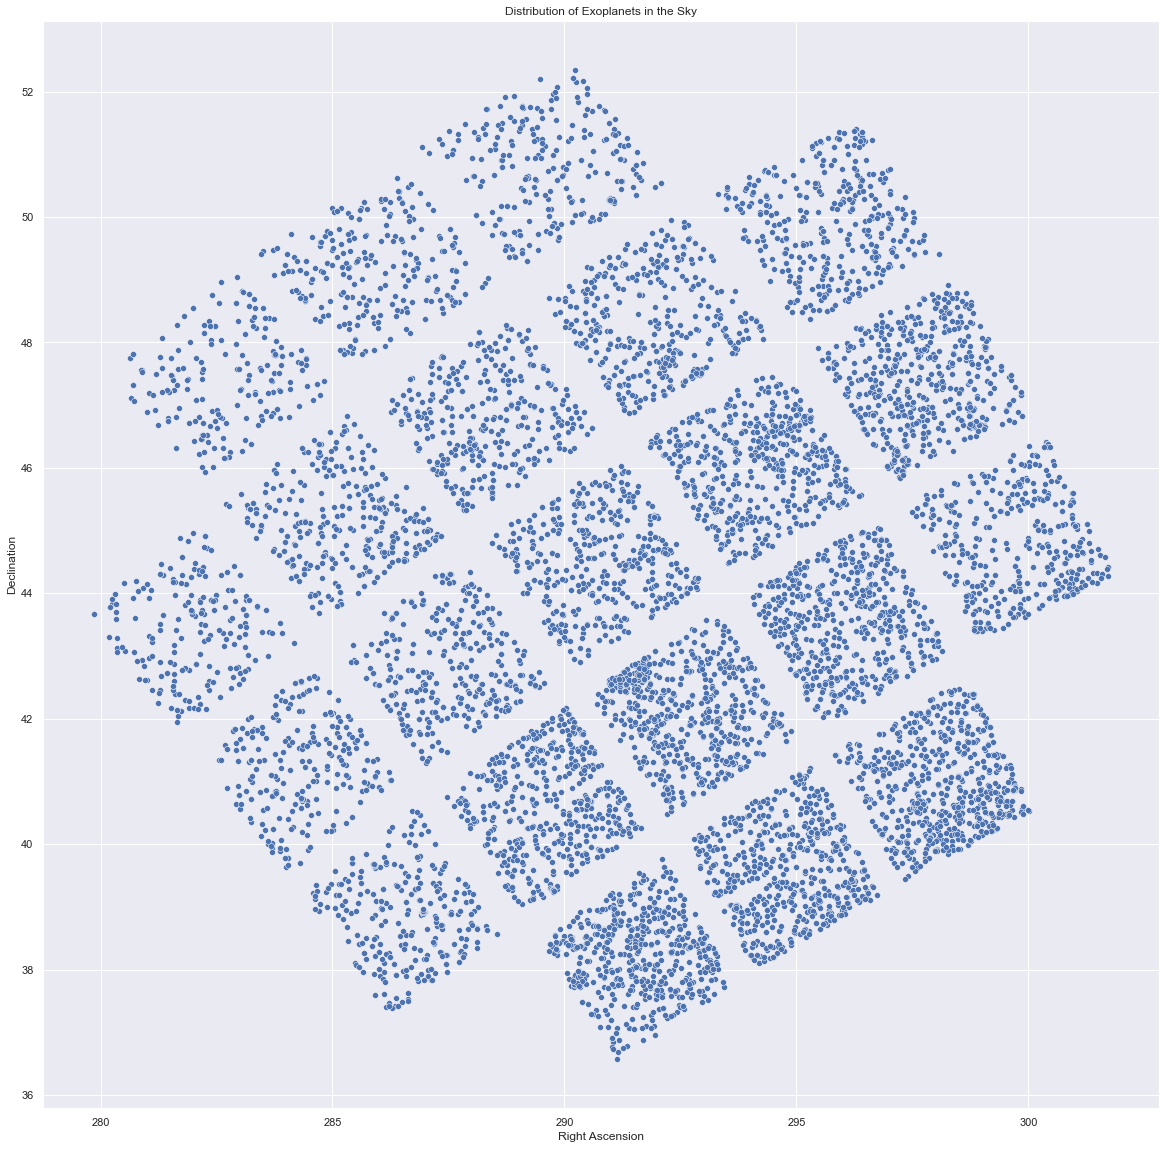

In [14]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x="Right Ascension", y="Declination").set(title="Distribution of Exoplanets in the Sky")

**The Kepler telescope used an array of charge coupled devices to detect light.**

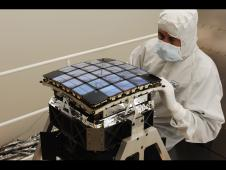 photo credit: [NASA](https://www.nasa.gov/mission_pages/kepler/spacecraft/index.html)

**It pointed at just one small section of the universe for more than 3 years.**

---
### 4. Exporting Processed Dataframe

In [15]:
pf.save_to_csv(df)

File will be saved to ../data/processed


Enter file name with .csv : milestone3.csv


Done
